In [1]:
import csv
import pandas as pd
import pymysql
import sqlite3
data = pd.read_csv("C:/Users/홍사빈/Desktop/archive/modified_data.csv", low_memory=False)
travel = csv.reader(data)
next(travel)

conn = pymysql.connect(host='127.0.0.1', port=3306,user='root',password='0000',db='mysql',charset='utf8')
cur = conn.cursor()

In [2]:
query = "SELECT * FROM modified_data"
df = pd.read_sql_query(query,conn)
conn.close()

C:\Temp\ipykernel_17268\615542492.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query,conn)


In [3]:
import ast
import nltk

def decode_bytes(text):
    try:
        return text.decode('utf-8')
    except AttributeError:
        return text

df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(lambda x: decode_bytes(x).replace("None", ""))
filtered_df = df[df['Consumer complaint narrative'] != '']

filtered_df['Consumer complaint narrative'] = filtered_df['Consumer complaint narrative'].str.replace('XXXX', ' ')

text = filtered_df['Consumer complaint narrative']

print('#Num of characters used: ', len(text))

#Num of characters used:  17730


C:\Temp\ipykernel_17268\2296861552.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Consumer complaint narrative'] = filtered_df['Consumer complaint narrative'].str.replace('XXXX', ' ')


In [4]:
print('#Text sample:')
print(text[:500])

#Text sample:
9        I moved to the   in   from another country. I ...
10       The debt collector RCI of  , WA repeatedly tri...
15       IN REGARDS TO SEVERAL ACCOUNTS ( listed below ...
42       Non payment by Wells Fargo Bank of a {$2500.00...
102      For history purposes, I rented this jet ski on...
                               ...                        
21304    XX/XX/   - fraudulent transaction of {$690.00}...
21311    We got behind in our mortgage payments due to ...
21318    The company flagship put a debt on my acct whi...
21334    Citi bank Best Buy credit card. They sent me a...
21375    Hello my name is    , In  , I opened an accoun...
Name: Consumer complaint narrative, Length: 500, dtype: object


In [5]:
from nltk.tokenize import word_tokenize

tokens_claims = text.apply(lambda x: word_tokenize(x))

all_tokens = []

for tokens in tokens_claims:
    all_tokens.extend(tokens)
    
print('#Num of tokens used: ', len(all_tokens))

#Num of tokens used:  3271630


In [6]:
print('#Token sample:')
print(all_tokens[:100])

#Token sample:
['I', 'moved', 'to', 'the', 'in', 'from', 'another', 'country', '.', 'I', 'applied', 'to', 'for', 'security', 'credit', 'card', 'and', 'was', 'denied', '.', 'Then', 'I', 'called', 'the', 'credit', 'department', 'and', 'was', 'told', 'that', 'in', ',', 'opened', 'a', 'saving', 'accounts', 'in', 'USAA', 'bank', 'and', ',', 'maybe', 'somewhere', 'else', ',', 'I', 'dont', 'know', '.', 'I', 'found', 'out', 'today', 'that', 'stole', 'my', 'personal', 'information', 'and', 'used', 'it', 'against', 'me', '.', 'I', 'physically', 'wasnt', 'at', 'the', 'country', 'at', 'that', 'time', 'as', 'I', 'lived', 'in', '.', 'I', 'moved', 'to', 'the', 'this', 'year', '.', 'I', 'want', 'you', 'to', 'help', 'me', 'to', 'investigate', 'the', 'case', 'as', 'my', 'credit', 'report', 'and']


In [7]:
from nltk.stem import PorterStemmer

stemmer=PorterStemmer()

stem_tokens=[stemmer.stem(token) for token in all_tokens]

print('#Num of tokens after stemming: ', len(stem_tokens))

#Num of tokens after stemming:  3271630


In [8]:
print('#Token sample: ')
print(stem_tokens[:100])

#Token sample: 
['i', 'move', 'to', 'the', 'in', 'from', 'anoth', 'countri', '.', 'i', 'appli', 'to', 'for', 'secur', 'credit', 'card', 'and', 'wa', 'deni', '.', 'then', 'i', 'call', 'the', 'credit', 'depart', 'and', 'wa', 'told', 'that', 'in', ',', 'open', 'a', 'save', 'account', 'in', 'usaa', 'bank', 'and', ',', 'mayb', 'somewher', 'els', ',', 'i', 'dont', 'know', '.', 'i', 'found', 'out', 'today', 'that', 'stole', 'my', 'person', 'inform', 'and', 'use', 'it', 'against', 'me', '.', 'i', 'physic', 'wasnt', 'at', 'the', 'countri', 'at', 'that', 'time', 'as', 'i', 'live', 'in', '.', 'i', 'move', 'to', 'the', 'thi', 'year', '.', 'i', 'want', 'you', 'to', 'help', 'me', 'to', 'investig', 'the', 'case', 'as', 'my', 'credit', 'report', 'and']


In [9]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer("[\w']{3,}")

reg_tokens = text.apply(lambda x: tokenizer.tokenize(x.lower()))

all_reg_tokens = []

for tokens in reg_tokens:
    all_reg_tokens.extend(tokens)

print('#Num of tokens with RegexpTokenizer: ', len(all_reg_tokens))

#Num of tokens with RegexpTokenizer:  2161081


In [10]:
print('#Token sample:')
print(reg_tokens[:100])

#Token sample:
9       [moved, the, from, another, country, applied, ...
10      [the, debt, collector, rci, repeatedly, tries,...
15      [regards, several, accounts, listed, below, wa...
42      [non, payment, wells, fargo, bank, 2500, bonus...
102     [for, history, purposes, rented, this, jet, sk...
                              ...                        
4683    [hope, this, letter, finds, you, well, writing...
4686    [recently, reviewed, credit, file, and, unfort...
4694    [transunion, has, problem, being, constant, vi...
4699    [accordance, with, the, fair, credit, reportin...
4702    [information, belongs, brother, and, falsely, ...
Name: Consumer complaint narrative, Length: 100, dtype: object


In [11]:
from nltk.corpus import stopwords

english_stops = set(stopwords.words('english'))

reg_tokens = text.apply(lambda x: tokenizer.tokenize(x.lower()))

result = []
for tokens in reg_tokens:
    filtered_tokens = [word for word in tokens if word not in english_stops]
    result.extend(filtered_tokens)

print('#Num of tokens after stopword elimination: ', len(result))

#Num of tokens after stopword elimination:  1443050


In [12]:
print('#Token sample: ')
print(result[:100])

#Token sample: 
['moved', 'another', 'country', 'applied', 'security', 'credit', 'card', 'denied', 'called', 'credit', 'department', 'told', 'opened', 'saving', 'accounts', 'usaa', 'bank', 'maybe', 'somewhere', 'else', 'dont', 'know', 'found', 'today', 'stole', 'personal', 'information', 'used', 'physically', 'wasnt', 'country', 'time', 'lived', 'moved', 'year', 'want', 'help', 'investigate', 'case', 'credit', 'report', 'score', 'depends', 'debt', 'collector', 'rci', 'repeatedly', 'tries', 'contact', 'phone', 'recorded', 'line', 'repeatedly', 'specifically', 'asked', 'record', 'conversations', 'refuse', 'least', 'one', 'occasion', 'representative', 'claimed', 'required', 'law', 'record', 'false', 'revised', 'code', 'washington', '030', 'reads', 'private', 'conversation', 'device', 'electronic', 'otherwise', 'designed', 'record', 'transmit', 'conversation', 'regardless', 'device', 'powered', 'actuated', '__without', 'first', 'obtaining__', 'consent', 'persons', 'engaged', 'conversation'

In [13]:
word_count=dict()
for word in result:
    word_count[word]=word_count.get(word, 0) + 1

print('#Num of used words: ', len(word_count))

#Num of used words:  18830


In [14]:
sorted_word_count=sorted(word_count, key=word_count.get, reverse=True)

print('#Top 20 high frequency words: ')
for key in sorted_word_count[:100]:
    print(f'{repr(key)}: {word_count[key]}', end=', ')

#Top 20 high frequency words: 
'credit': 34570, 'account': 26660, 'information': 24971, 'consumer': 24192, 'report': 22948, 'reporting': 18564, 'section': 10119, 'accounts': 9788, 'agency': 8015, 'payment': 7218, 'states': 6774, '1681': 6305, 'bank': 6280, 'also': 6219, 'debt': 6103, 'items': 6062, 'please': 6010, 'inaccurate': 5822, 'without': 5572, 'number': 5501, 'balance': 5499, 'person': 5332, 'card': 5272, 'would': 5130, 'act': 5056, 'identity': 4975, 'request': 4943, 'time': 4837, 'following': 4785, 'rights': 4769, 'received': 4657, 'usc': 4587, 'never': 4580, 'name': 4566, 'date': 4557, 'fair': 4555, 'company': 4487, 'written': 4454, 'privacy': 4447, 'may': 4443, 'late': 4392, 'theft': 4349, 'remove': 4281, 'furnish': 4238, 'letter': 4210, 'made': 4197, 'days': 4088, 'right': 4087, 'sent': 4067, 'payments': 4050, 'told': 4035, 'financial': 3998, 'fraudulent': 3852, 'dispute': 3779, 'code': 3659, '2023': 3630, 'file': 3577, 'reported': 3545, 'due': 3534, 'complaint': 3426, 'mone

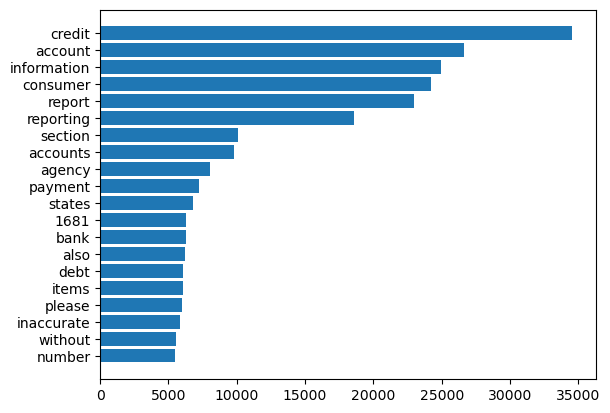

In [15]:
import matplotlib.pyplot as plt

n=sorted_word_count[:20][::-1]
w=[word_count[key] for key in n]

plt.barh(range(len(n)), w, tick_label=n)
plt.show()

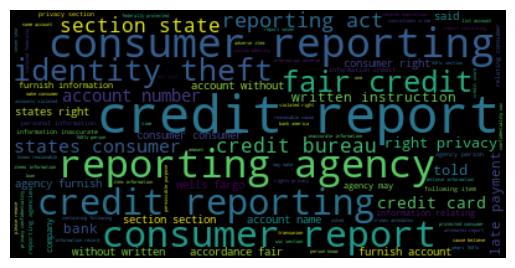

In [19]:
from wordcloud import WordCloud

text = ' '.join(result)
wordcloud = WordCloud().generate(text)

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

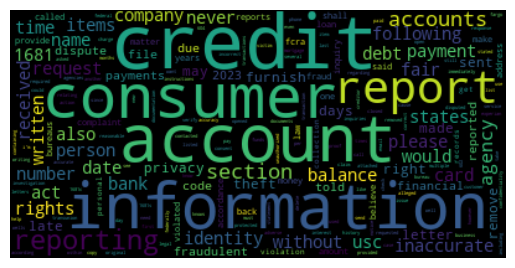

In [20]:
wordcloud=WordCloud(max_font_size=60).generate_from_frequencies(word_count)
plt.figure()
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()